In [4]:
import os
import pandas as pd 

working_directory = os.getcwd()
data_path = "data"
file_training = "GiveMeSomeCredit-training.csv"

file_full_path_training = os.path.join(working_directory, data_path, file_training)

if not os.path.exists(file_full_path_training):
    print("Could not find file: " + file_full_path_training)
else:
    data = pd.read_csv(file_full_path_training)    
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
def missing_values_table(df):
    """ Purpose: To examine a Pandas dataframe and output the list of columns with missing data (NaN or blanks).
        Returns: DataFrame with two columns.  Missing Values    AND   Missing as a % of Total Values.
    """
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
        
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MonthlyIncome,29731,19.8
NumberOfDependents,3924,2.6


In [9]:
data.describe().round(decimals=2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


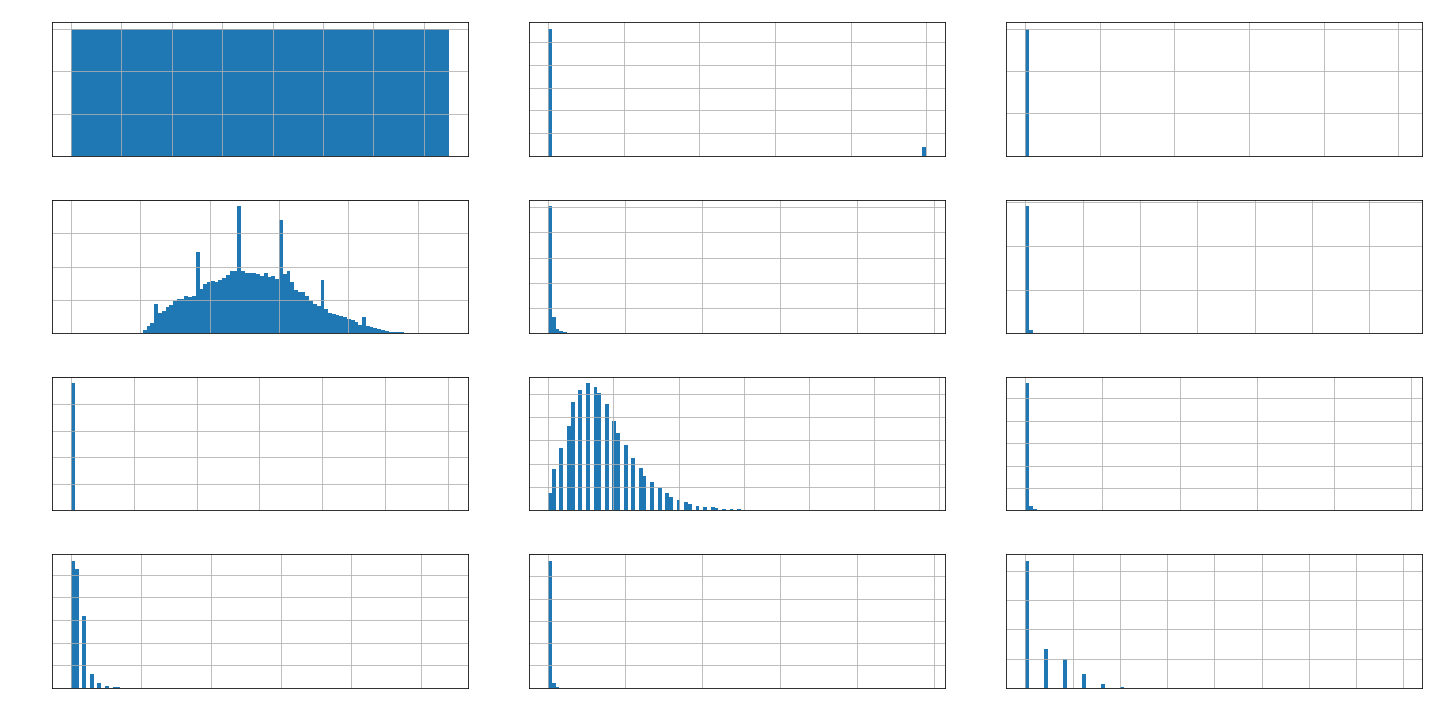

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='w')                     # Individual title colours.

        ax.xaxis.label.set_color('white')  
        ax.yaxis.label.set_color('white')          
        ax.tick_params(axis='x', colors='white')       #set the color of xticks
        ax.tick_params(axis='y', colors='white')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(data, data.columns, 4, 3)

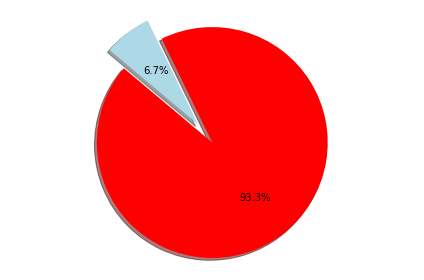

In [55]:
import matplotlib.pyplot as plt

nos = sum(data["SeriousDlqin2yrs"] == 0);
yeses = sum(data["SeriousDlqin2yrs"] == 1);
total = len(data["SeriousDlqin2yrs"]);

# Data to plot
labels = 'NO', 'YES'
sizes = [nos, yeses]
colors = ['red', 'lightblue']
explode = (0.2, 0)  # explode 1st slice

# Plot
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140);

for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')
    
plt.axis('equal');                   # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout();
plt.show();

In [287]:
# Check if values for "SeriousDlqin2yrs" are either 0 or 1. 
sum(data['SeriousDlqin2yrs']==0)+sum(data['SeriousDlqin2yrs']==1)

150000

cut_off:5.0


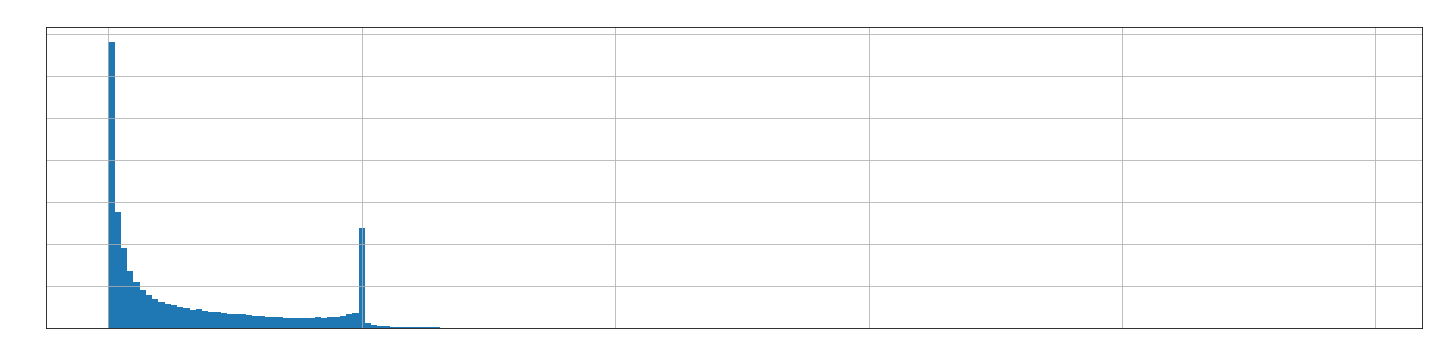

cut_off:98.0


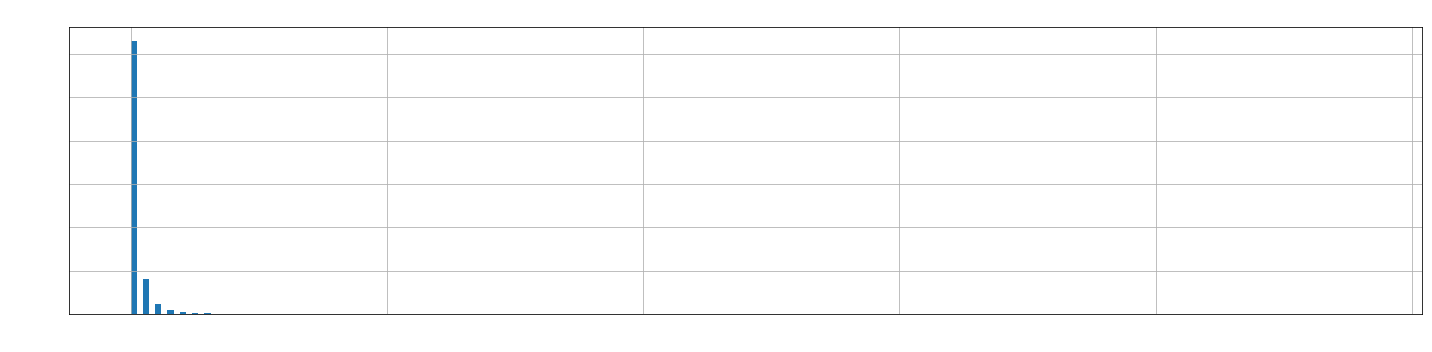

cut_off:98.0


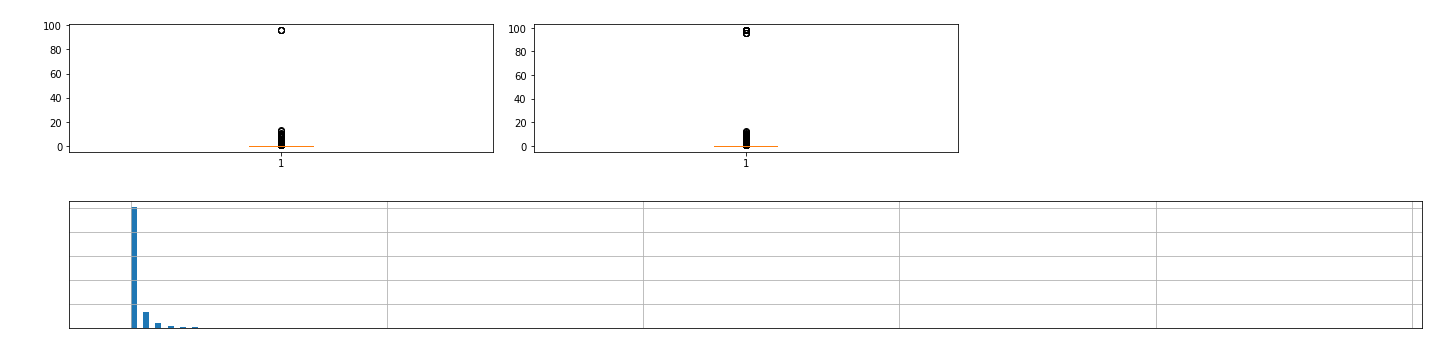

cur bin:148403 pre bin: 148403 Last percentile: 0.991 Curr percentile: 0.992
cur bin:148403 pre bin: 148403 Last percentile: 0.992 Curr percentile: 0.993
cur bin:148403 pre bin: 148403 Last percentile: 0.993 Curr percentile: 0.994
cur bin:149150 pre bin: 148403 Last percentile: 0.994 Curr percentile: 0.995
cur bin:149150 pre bin: 149150 Last percentile: 0.995 Curr percentile: 0.996
cur bin:149492 pre bin: 149150 Last percentile: 0.996 Curr percentile: 0.997
cur bin:149686 pre bin: 149492 Last percentile: 0.997 Curr percentile: 0.998
cur bin:149736 pre bin: 149686 Last percentile: 0.998 Curr percentile: 0.999
cur bin:149736 pre bin: 149736 Last percentile: 0.999 Curr percentile: 1.0


,Percentile,# Examples to Percentile,# Examples in bin,Example Level
0,0.991,148403.0,148403.0,4.0
1,0.992,148403.0,0.0,4.0
2,0.993,148403.0,0.0,4.0
3,0.994,148403.0,0.0,4.0
4,0.995,149150.0,747.0,5.0
5,0.996,149150.0,0.0,5.0
6,0.997,149492.0,342.0,6.0
7,0.998,149686.0,194.0,8.0
8,0.999,149736.0,50.0,98.0
9,1.000,149736.0,0.0,98.0


In [379]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

data_column = 4
percentile_to_cut_off  = 1
data_to_use = data[data.columns[data_column]]

cut_off = data_to_use.quantile(percentile_to_cut_off)

data_subset =  data_to_use[data_to_use < cut_off]
print('cut_off:' + str(cut_off))
fig=plt.figure(figsize=(20, 5))
ax=fig.add_subplot(1,1,1)
data_subset.hist(bins=200,ax=ax) 
ax.xaxis.label.set_color('white')  
ax.yaxis.label.set_color('white')          

ax.set_xlabel('# Open Credit Lines')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


ax.tick_params(axis='x', colors='white')       #set the color of xticks
ax.tick_params(axis='y', colors='white')       #set the color of yticks
title_obj = ax.set_title('Determinig Data Cut-Off for: ""' + data.columns[data_column] + '"', fontsize=20)
plt.setp(title_obj, color='w')                     # Individual title colours.

fig.tight_layout()  # Improves appearance a bit.
plt.show()


print('cut_off:' + str(cut_off))


fig=plt.figure(figsize=(20, 5))
n_rows = 2
n_cols = 3

gs = gridspec.GridSpec(ncols = n_cols, nrows = n_rows, figure=fig)
#=========================================
# BEGIN OF: Box Plots:
#=========================================
# Create an axes instance
ax =fig.add_subplot(gs[0, 0])
bp = ax.boxplot(data_subset)
title_obj = ax.set_title('Without Cut-Off', fontsize=15)
plt.setp(title_obj, color='w')                     # Individual title colours.

ax = fig.add_subplot(gs[0,1])
bp = ax.boxplot(data[data.columns[data_column]])
title_obj = ax.set_title('Applying Cut-Off', fontsize=15)
plt.setp(title_obj, color='w')                     # Individual title colours.
#=========================================
# END OF: Box Plots.
#=========================================

#=========================================
# BEGIN OF: Histogram:
#=========================================
ax = fig.add_subplot(gs[1,:])
data_subset.hist(bins=200,ax=ax) 

#ax.set_xlabel('Monthly Salary')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.xaxis.label.set_color('white')  
ax.yaxis.label.set_color('white')          
ax.tick_params(axis='x', colors='white')       #set the color of xticks
ax.tick_params(axis='y', colors='white')       #set the color of yticks
title_obj = ax.set_title('Applying Cut-Off', fontsize=15)
plt.setp(title_obj, color='w')                     # Individual title colours.
#=========================================
# END OF: Histogram:
#=========================================

# Create a figure instance
title_obj = ax.set_title('Observing Any Outliers for: "' + data.columns[data_column] + '"', fontsize=20)
plt.setp(title_obj, color='w')                     # Individual title colours.
fig.tight_layout()  # Improves appearance a bit.
plt.show()



import pandas as pd 
import numpy as np

# A look at the number of data points above a threshold.
i = 0.990;
number_of_points = np.empty((0))
percentile = np.empty((0))
cut_off = np.empty((0))
number_of_points_in_current_bin = np.empty((0))
while (i<1):
    i = i + 0.001    
    if i>1:
        i=1

    if len(percentile)<1:
        number_of_points_up_to_previous_bin = 0
    else:
        number_of_points_up_to_previous_bin = sum(data_to_use < data_to_use.quantile(percentile[-1]))
    
    number_of_points_up_to_current_bin = sum(data_to_use < data_to_use.quantile(i))
    number_of_points_in_current_bin = np.append(number_of_points_in_current_bin, number_of_points_up_to_current_bin - number_of_points_up_to_previous_bin)
    number_of_points = np.append(number_of_points, number_of_points_up_to_current_bin)
    cut_off = np.append(cut_off, round(data_to_use.quantile(i),2))
    
    if len(percentile)>0:
        print( "cur bin:" + str(number_of_points_up_to_current_bin) +  " pre bin: " + str(number_of_points_up_to_previous_bin) + " Last percentile: " + str(percentile[-1]) + " Curr percentile: " + str(i) )    
    
    percentile = np.append(percentile, round(i,4))

    

df = pd.DataFrame(data = np.column_stack((percentile,number_of_points,number_of_points_in_current_bin, cut_off)), columns = ['Percentile','# Examples to Percentile','# Examples in bin','Example Level']) 
df

In [276]:
sum(data['age']<21)

1

In [ ]:
df

In [348]:
data_to_use.sort()

AttributeError: 'Series' object has no attribute 'sort'

In [352]:
np.sort(da)

array([1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.56010e+06,
       1.79406e+06, 3.00875e+06])

In [351]:
da = data_to_use[data_to_use>0]

In [382]:
sum(data_to_use>=90)

269